<a href="https://colab.research.google.com/github/lijp16/lijp16/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

###PyTorch Workflow
1. data(prepare and load)
2. build model
3. fitting model to data(training)
4. improve model with experimentation
5. making prediction and evaluating a model
6. saving and loading a model

In [ ]:
torch.__version__

'2.4.1+cu121'

## 1. data preparing and loading

type
* text
* audio
* videos
* dna
* images
* excel sheets

ml in 2 parts:
1. get data into number
2. built model to find pattern


use linear regression

In [ ]:
#create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(Y)

(50, 50)

In [ ]:
# split data into training set, validation set(not always) and test set

train_split = int(0.8*len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

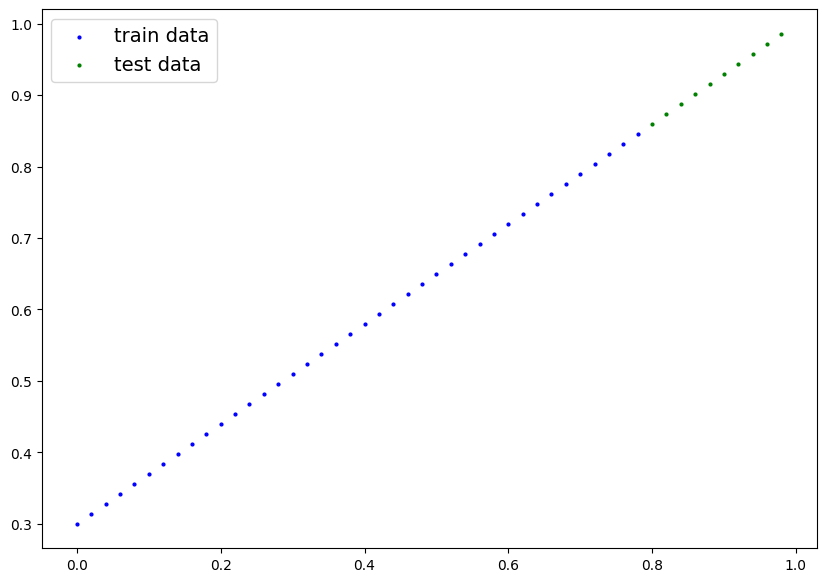

In [ ]:
#visualize data

def plot_predictions(train_data = X_train,
                     train_lables = Y_train,
                     test_data = X_test,
                     test_lables = Y_test,
                     predictions = None):
  """
  Plots training data, test data and comepare predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_lables, c="b", s=4, label="train data")
  plt.scatter(test_data, test_lables, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14});

plot_predictions()

In [ ]:
# bulid linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#making prediction using 'torch.inference_mode()'

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds,Y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

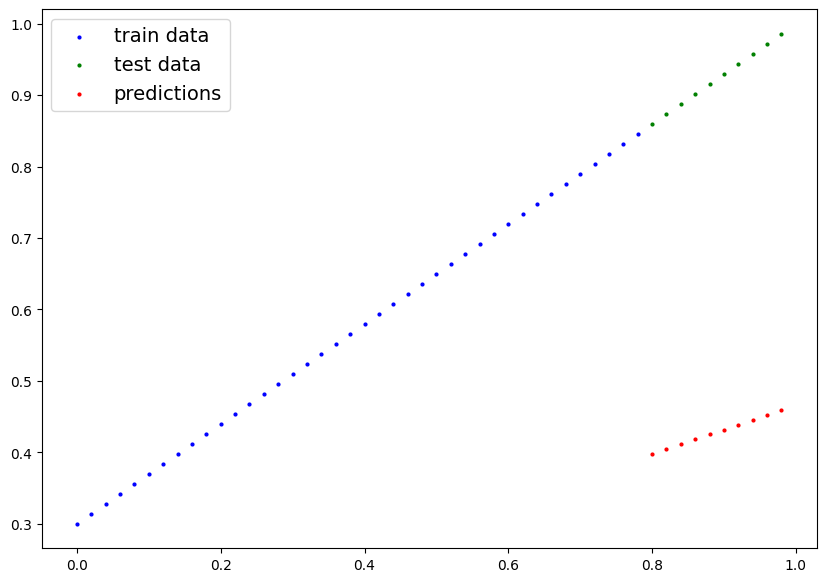

In [ ]:
plot_predictions(predictions=y_preds)

### train model:for a model to move from unknown to some known perameter.
 use loss functions to show how poor or how wrong the prediction are. (lower is better)
 * things we need to train:
1. loss function:how poor or how wrong the prediction are
2. optimizer: takes into account the loss of a model and adjusts the model's parameter
 * in pytorch we need:
1. a training loop
2. a testing loop



In [ ]:
#set up loss functions
loss_fn = nn.L1Loss()

#set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### building training loop and a testing loop in pytorch

* things we need in a training loop:
0. loop through the data
1. forward pass
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwards through the network to calculate the gradients of each of tne parameters of our model with respect to the loss
5. optimizer step - use the optimizer to adjust model's parameters to try and improve the loss

In [ ]:
torch.manual_seed(42)
epochs = 200
epochs_count = []
loss_value = []
test_loss_value = []
for epochs in range(epochs):
  model_0.train() #set model to training model
  y_preds = model_0(X_train) #forward pass
  loss = loss_fn(y_preds,Y_train) #calculate loss
  optimizer.zero_grad()
  loss.backward() #proform backpropagation
  optimizer.step() #use the optimizer to adjust model's parameters to try and improve the loss
  model_0.eval() #turn off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,Y_test)
  if epochs%10==0:
    epochs_count.append(epochs)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(model_0.state_dict())
    print(f"Epochs:{epochs}loss:{loss}Test Loss:{test_loss}")

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epochs:0loss:0.31288138031959534Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epochs:10loss:0.1976713240146637Test Loss:0.3463551998138428
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epochs:20loss:0.08908725529909134Test Loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epochs:30loss:0.053148526698350906Test Loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epochs:40loss:0.04543796554207802Test Loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epochs:50loss:0.04167863354086876Test Loss:0.09919948130846024
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epochs:60loss:0.03818932920694351Test Loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5288])), ('bias

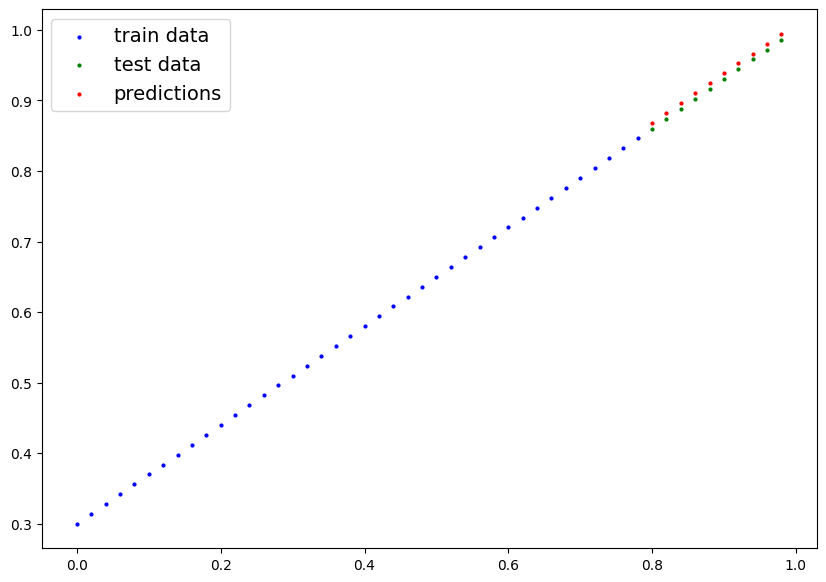

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

Text(0.5, 0, 'Epochs')

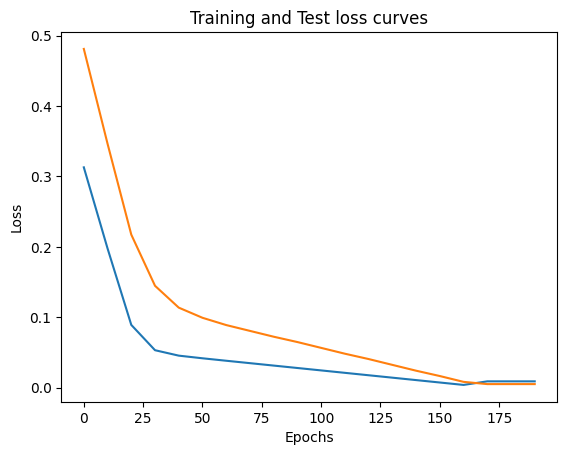

In [ ]:
#turn tensor to numpy
import numpy as np
#polt loss curves
plt.plot(epochs_count,np.array(torch.tensor(loss_value).numpy()),label = "Train loss")
plt.plot(epochs_count,np.array(torch.tensor(test_loss_value).numpy()),label = "Test loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

### saving model
1. `torch.save()` - allow you save a pytorch object in python pickle format
2. `torch.load()` - allow you load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary



In [ ]:
#saving our pytorch model
from pathlib import Path
#1. create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#2. create model save path
MODEL_NAME = "01_pytorch_worflow_LR_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
#3 saving the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_worflow_LR_model_0.pth


In [ ]:
#load model with saved state dict()
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.state_dict()

<ipython-input-65-3f98cca8234f>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])